In [1]:
#Import Libraries
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Import Data

url = "https://raw.githubusercontent.com/Kile-kun/Data_Analysis-Projects/main/Maxisage%20Project/LPG_Raw.csv"
data_set = read_csv(url)

#Drop Unneeded Columns

data_set = data_set.drop(['S/No.'], axis=1)

#Highlighting Independent and Dependet Variables

x= data_set.iloc[:, 0:7].values
y= data_set.iloc[:,7].values

#Converting Categorical Variables to Numerical Variables

label_encoder_x= LabelEncoder() 
x[:, 0]= label_encoder_x.fit_transform(x[:, 0])
x[:, 1]= label_encoder_x.fit_transform(x[:, 1]) 
x[:, 4]= label_encoder_x.fit_transform(x[:, 4]) 
x[:, 5]= label_encoder_x.fit_transform(x[:, 5]) 
x[:, 6]= label_encoder_x.fit_transform(x[:, 6])

labelencoder_y= LabelEncoder()  

y= labelencoder_y.fit_transform(y)

#Choosing and COnverting Dummy Variable(Profession)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))

##Splitting Dataset for Training and Testing
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

#Feature scaling of both independent and dependent variables
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

# BUILDING AND COMPARING MODELS

In [2]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.447431 (0.072507)
LDA: 0.429842 (0.056255)
KNN: 0.332016 (0.147923)
CART: 0.375889 (0.050608)
NB: 0.287945 (0.122590)
SVM: 0.415810 (0.076756)


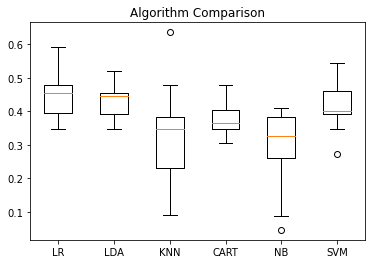

In [3]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()